# Clusterización de personas

## Presentación del caso

Este ejercicio nos permite ejecutar un código para agrupar personas según las características de cada una. Para el presente ejemplo se ha considerado **100 personajes famosos a nivel mundial relacionados al cine, música, arte y deporte**.

![Image of Yaktocat](https://www.lifeder.com/wp-content/uploads/2017/01/dinámicas-de-cohesión.jpg)

El dataset se ha obtenido gracias a un **estudio** realizados sobre los razgos de la personalidad basado en los tweets publicados por el famoso. Cada rasgo ha sido **cuantificado en una columna**: Openess, Extraversion y Agreeablenes

1.- *Openess*: Honestidad, franqueza, transparencia

2.- *Extraversion*: Extraversión, ímpetu, dinamismo, entusiasmo.

3.- *Agreeablenes*: Agradable, amable, buen tipo, cordial.

El reto será comparar la agrupación obtenida por KMeans y la clasificación por sus trabajos. Tomar nota que el dataset tiene registrada en la columna **categoría** el trabajo:

**Categoría 1:** Actores y actrices de Hollywood

**Categoría 2:** Cantantes

**Categoría 3:** TV Host (presentadores de televisión)

**Categoría 4:** Deportistas

**Categoría 5:** Políticos

**Categoría 6:** Escritores

## Importación de librerías

In [1]:
"CELDA N°1"
import pandas as pd #Importamos la librería pandas que nos sirve para manipular datos tabulares (filas y columnas) como archivos csv
import numpy as np #Importamos la librería numpy que nos sirve para manipular datos numéricos así como funciones y variables matemáticas
import matplotlib.pyplot as plt #Importamos la librería pyplot de matplotlib para poder realizar gráficos básicos
import seaborn as sns #Importamos la librería seaborn para poder realizar gráficos más elaborados

## Lectura de los datos

In [2]:
"CELDA N°2"
#Para leer los datos utilizamos el método read_csv de la librería pandas
#Además hemos guardado los datos en una nueva variable denominada data
data = pd.read_csv("https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/clustering_stars.csv")
data

,usuario,op,ex,ag,categoria
0,antoniobanderas,41.328182,39.173333,21.070505,1
1,charliesheen,36.272348,40.065152,28.706894,1
2,CourteneyCox,53.110480,39.006080,17.206400,1
3,DianeKeaton,46.955854,35.376179,23.747561,1
4,EdwardNorton,40.046439,37.722197,30.568258,1
...,...,...,...,...,...
95,ANNELAMOTT,39.013974,44.809208,28.665576,6
96,MargaretAtwood,36.874076,42.150859,25.125902,6
97,SusanOrlean,39.090106,44.383642,27.753638,6
98,HarlanCoben,35.413967,42.048513,28.044871,6


In [3]:
#"CELDA N°2.1"  - "Otras formas de leer datos"
# Para leer los datos cuando tu archivo CSV está en tu ordenador 

#from google.colab import files
#uploaded = files.upload()

#import pandas as pd
#import io


#dataset = pd.read_csv(io.StringIO(uploaded['estatura.csv'].decode('utf-8')))
#dataset

In [4]:
#"CELDA N°2.2"  - "Otras formas de leer datos"
# Para leer los datos cuando tu archivo CSV está en Google Drive

#from google.colab import drive
#drive.mount('/content/drive')

#import pandas as pd

#dataset = pd.read_csv('/content/drive/MyDrive/estatura.csv')
#dataset

In [5]:
"CELDA N°3"
#Para verificar que hemos leído correctamente los datos ejecutamos el método head
#Por defecto el método head arroja los primeros cinco (5) elementos, pero puedes variar el número
#Otras variaciones son (-1)=todos los elementos o tail() que muestra los últimos cinco elementos"""
data.head()

,usuario,op,ex,ag,categoria
0,antoniobanderas,41.328182,39.173333,21.070505,1
1,charliesheen,36.272348,40.065152,28.706894,1
2,CourteneyCox,53.110480,39.006080,17.206400,1
3,DianeKeaton,46.955854,35.376179,23.747561,1
4,EdwardNorton,40.046439,37.722197,30.568258,1


In [6]:
"CELDA N°4"
#Para entender mejor el comportamiento de los datos y la agrupación final vamos a reemplazar algunos datos """
data.rename(columns = {"op": "transparencia", "ex": "impetu", "ag":"amabilidad"}, inplace = True)
data['categoria'].replace({1: "HollywoodStar", 2: "Cantantes", 3:"TV Host", 4:"Deportistas", 5:"Políticos", 6:"Escritores"}, inplace=True)

In [7]:
"CELDA N°5"
#Para obtener una vista rápida de las principales características estadísticas sobre las variables cuantitativas de la data 
#utilizamos el método describe: conteo, promedio(mean), desviación estandar(std), minimo(min), percentiles (25,50,75), maximo
data.describe()

,transparencia,impetu,amabilidad
count,100.000000,100.000000,100.000000
mean,42.551004,41.790313,23.948459
std,7.845528,6.368387,7.599255
min,30.020465,26.855564,9.305985
25%,36.586832,37.885109,17.408286
50%,40.361461,42.210377,23.779165
75%,47.360164,45.299122,29.411496
max,66.665564,59.824844,40.096458


Como conclusión podemos comprobar que **no existen nulos ni vacíos en ninguna columna** porque de otro modo la variable *count* de la primera fila no resultaría 100 en todas las columnas.

También podemos obtener el **número de personas que actualmente se encuentran en cada grupo** Para ello utilizamos dos métodos:

1.- groupby: que agrega o agrupa los datos en base a una característica (columna)

2.- size: calcular el número de registros

In [8]:
"CELDA N°6"
#U<tilizamos print para mostrar el resultado y el método size fuera de groupby para contar los elementos de cada grupo
print(data.groupby('categoria').size())

categoria
Cantantes        17
Deportistas      17
Escritores       15
HollywoodStar    17
Políticos        17
TV Host          17
dtype: int64


Como resultado podemos visualizar que cada categoría tiene casi la misma cantidad de personas. Esto es importante porque nos permite prevenir un **sesgo** del modelo ante data **desbalanceada**.

## Preprocesamiento de los datos

*Histograma:* Permite graficar las distribuciones de cada variable a través de un conteo en intervalos. Para ello utilizamos el método **hist()**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f581633e5d0>,
      dtype=object)

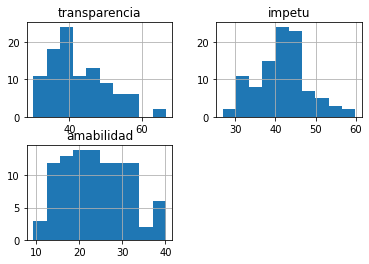

In [9]:
"CELDA N°7"
#Primero eliminamos temporalmente categoría y luego aplicamos el histograma sobre las variables cuantitativas dependientes
data.drop(['categoria'],1).hist()

*Diagrama de dispersión:* Permite graficar las distribuciones de cada variable a través de un diagrama de puntos sobre un plano cartesiano. Además realiza las gráficas combinando todas las variables de 2 en 2. Para ello utilizamos el método **pairplot** de la librería **seaborn**

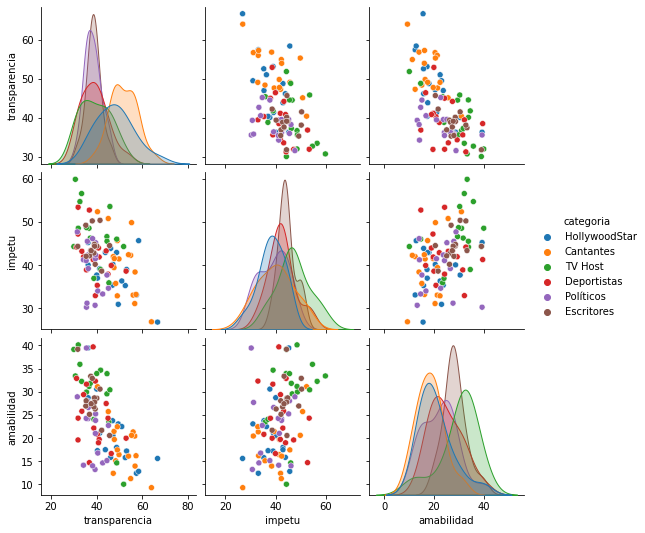

In [10]:
"CELDA N°8"
#El método pairplot dibuja todas las gráficas entre variables comparándolas en pares
#Además cuenta con un parámetro hue para añadir un filtro y el parámetro kind define el tipo de gráfica
sns.pairplot(data, hue='categoria',vars=["transparencia", "impetu", "amabilidad"],kind='scatter');
plt.show()

*Boxplot:* Permite graficar la distribución de una variable para identificar **outliers**. De forma ideal se deben eliminar o reemplazar todos los outliers para representar el comportamiento real de los datos **sin valores atípicos**. Sin embargo, para no perder información se puede admitir un porcentaje mínimo de outliers: **5% -10%**

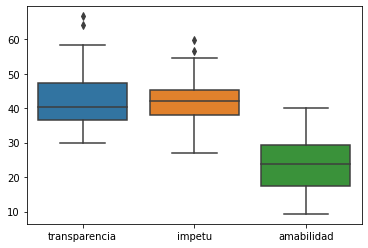

In [11]:
"CELDA N°9"
#Dibujamos el boxplot de la variable openess a través del método boxplot de la librería seaborn (sb) 
sns.boxplot(data=data)
plt.show()

A modo de conclusión no se ha encontrado valores vacíos o nulos. Además se ha admitido un porcentaje mínimo de outliers en los datos. Por otro lado las escalas en que se encuentran las variables son similares por lo tanto no es necesario una normalización de los datos.

## Modelamiento

El primer paso será definir el **número óptimo de cluster** y para ello utilizamos el método **inertia** dependiendo del número de cluster.

In [12]:
"CELDA N°10"
#Importamos KMeans de sklearn.cluster para poder ejecutar el modelo de agrupamiento
from sklearn.cluster import KMeans


In [13]:
"CELDA N°11"
#Calculamos la inercia aplicando KMeans varias veces aumentando el número de cluster de 1 al 10
inercia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k).fit(data.loc[:, ["transparencia", "impetu", "amabilidad"]])
  inercia.append(kmeans.inertia_)

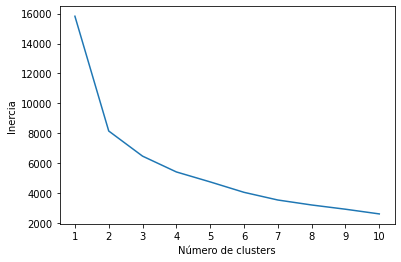

In [14]:
"CELDA N°12"
#Graficamos el diagrama de codo para visualizar cómo varía la inercia según el número de cluster
plt.plot(range(1, 11), inercia)
plt.xticks(range(1, 11))
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

Se evidencia que con solo **2 clusters** disminuimos la inercia de 16,000 hasta 8,000 **( - 50%)**.

Luego con **3 clusters** disminuimos la inercia de 8,000 hasta 6,500 **( - 18,75%)**.

Finalmente con **4 clusters** disminuimos la inercia de 6,500 hasta 5,500 **( - 15,38%)**


Por ello solo nos quedaremos con 3 clusters, ya que a partir de 4 cluster la mejora será mínima.

In [15]:
"CELDA N°13"
#Actualizamos la variable kmeans para definir el modelo KMeans con tres clusters fijos
kmeans = KMeans(n_clusters=3).fit(data.loc[:, ["transparencia", "impetu", "amabilidad"]])

In [16]:
"CELDA N°14"
#Podemos obtener los centroides de cada cluster con el método cluster_centers_
centroides = kmeans.cluster_centers_

Con el modelo KMeans con el **número de clúster óptimos** y sus **respectivos centroides** procedemos a generar las **predicciones**.

In [17]:
"CELDA N°15"
#Creamos una nueva columna cluster donde mostrar a cuál de los 3 cluster pertenece cada persona
data['cluster'] = kmeans.predict(data.loc[:, ["transparencia", "impetu", "amabilidad"]])

Finalmente podemos visualizar **los tres cluster con sus centroides** a través de un **gráfico 3D**

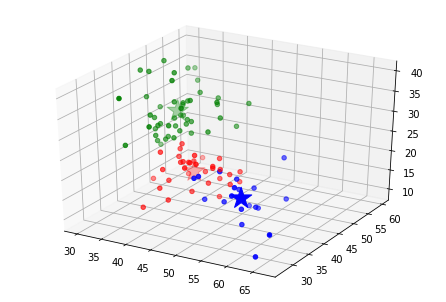

In [18]:
"CELDA N°16"
#Importamos Axes3D de mplot3d a partir de mpl_toolkits para graficar en formato tridimensional
from mpl_toolkits.mplot3d import Axes3D
colores=['green','blue','red']
asignar=[]
for row in data['cluster']:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data['transparencia'], data['impetu'], data['amabilidad'], c=asignar)
ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2], marker='*', c=colores, s=500)
plt.show()

# Análisis de resultados

Para visualizar el valor **promedio** de cada variable podemos mostrar una tabla similar a las tablas dinámicas que ejecutamos en Excel y así comprobar el comportamiento diferente entre cada cluster

In [19]:
"CELDA N°17"
#Para mostrar tablas dinámicas en Python usamos el método pivot_table y el parámetro aggfunc para definir qué mostrar
data.pivot_table(["transparencia", "impetu", "amabilidad"], 'cluster', aggfunc=np.mean)

,amabilidad,impetu,transparencia
cluster,,,
0,30.419828,44.852636,37.082881
1,16.639085,36.640846,55.031576
2,18.743985,40.300869,43.318854


Para obtener los elementos más representativos de cada cluster vamos a seleccionar aquellos elementos que **están más cerca a los centroides** de cada cluster

In [20]:
"CELDA N°18"
#Importamos pairwise_distances_argmin_min para medir la distancia entre los elementos y su centroide para cada cluster
from sklearn.metrics import pairwise_distances_argmin_min

In [21]:
"CELDA N°19"
#Creamos una variable mas_centrados para descubrir los registros que están más cerca a los centroides de cada cluster
mas_centrados, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, data.loc[:, ["transparencia", "impetu", "amabilidad"]])
mas_centrados

array([46,  5, 64])

In [22]:
"CELDA N°20"
#Para descubrir el nombre de los elementos seleccionados utilizamos los números como índices de la columna usuario
nombres = data['usuario']
for row in mas_centrados:
    print(nombres[row])

mariapatino
EmWatson
paugasol
